In [ ]:
#Reading CSV File
import pandas as pd
a=pd.read_csv('/content/delhi_aqi.csv')
print(a)

                      date       co     no     no2     o3     so2   pm2_5  \
0      2020-11-25 01:00:00  2616.88   2.18   70.60  13.59   38.62  364.61   
1      2020-11-25 02:00:00  3631.59  23.25   89.11   0.33   54.36  420.96   
2      2020-11-25 03:00:00  4539.49  52.75  100.08   1.11   68.67  463.68   
3      2020-11-25 04:00:00  4539.49  50.96  111.04   6.44   78.20  454.81   
4      2020-11-25 05:00:00  4379.27  42.92  117.90  17.17   87.74  448.14   
...                    ...      ...    ...     ...    ...     ...     ...   
18771  2023-01-24 04:00:00  1762.39   4.64   37.01  33.26   30.52  231.15   
18772  2023-01-24 05:00:00  1735.69   6.82   34.96  46.49   34.33  225.08   
18773  2023-01-24 06:00:00  1922.61   8.16   40.10  56.51   43.39  242.49   
18774  2023-01-24 07:00:00  1361.85   9.05   52.78  71.53  100.14  165.67   
18775  2023-01-24 08:00:00  1134.87   8.61   56.89  80.11  110.63  123.76   

         pm10    nh3  
0      411.73  28.63  
1      486.21  41.04  
2     

In [ ]:
print(a.isnull())

        date     co     no    no2     o3    so2  pm2_5   pm10    nh3
0      False  False  False  False  False  False  False  False  False
1      False  False  False  False  False  False  False  False  False
2      False  False  False  False  False  False  False  False  False
3      False  False  False  False  False  False  False  False  False
4      False  False  False  False  False  False  False  False  False
...      ...    ...    ...    ...    ...    ...    ...    ...    ...
18771  False  False  False  False  False  False  False  False  False
18772  False  False  False  False  False  False  False  False  False
18773  False  False  False  False  False  False  False  False  False
18774  False  False  False  False  False  False  False  False  False
18775  False  False  False  False  False  False  False  False  False

[18776 rows x 9 columns]


In [ ]:
#target variable
print(a['co'])

0        2616.88
1        3631.59
2        4539.49
3        4539.49
4        4379.27
          ...   
18771    1762.39
18772    1735.69
18773    1922.61
18774    1361.85
18775    1134.87
Name: co, Length: 18776, dtype: float64


In [ ]:
#data processing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv("/content/delhi_aqi.csv")
print(data.isnull().sum())

print(data.describe())

X = data.drop(['date', 'co'], axis=1)
y = data['co']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000      0.000000      4.280000      0.000000      5.250000   
25%     1068.120000      0.680000     33.930000      0.340000     34.810000   
50%     1842.500000      5.250000     54.150000     27.180000     52.930000   
75%     3685.000000     35.760000     83.630000     92.980000     82.020000   
max    21148.680000    500.680000    460.620000    801.090000    579.830000   

              pm2_5          pm10           nh3  
count  18776.000000  18776.000000  18776.000000  
mean     238.130309    300.092966     25.109815  
std      226.533625    267

Linear Regression:
Mean Squared Error (MSE): 146726.25792939347
R-squared (R2): 0.9816374558803824


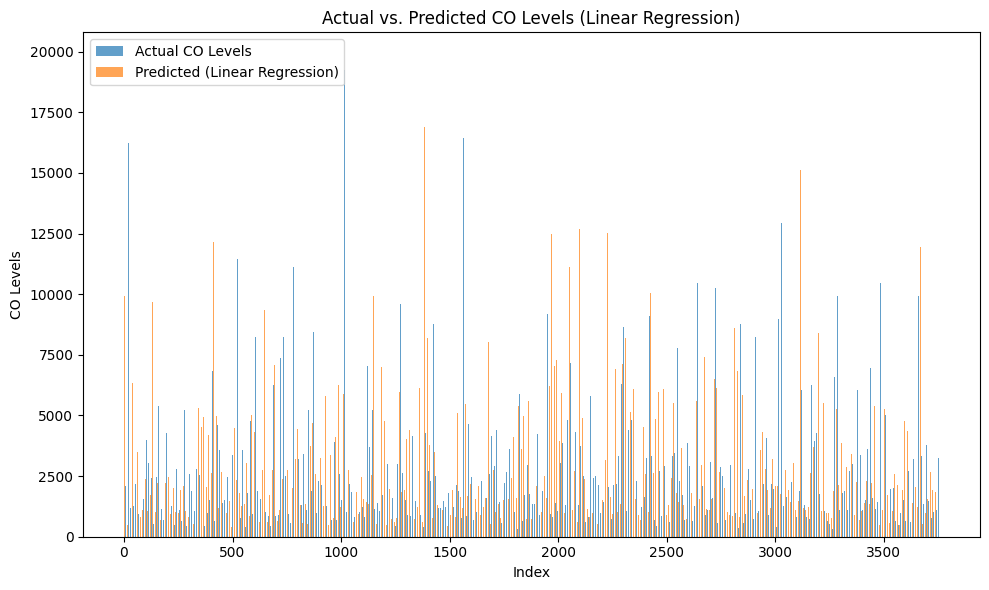

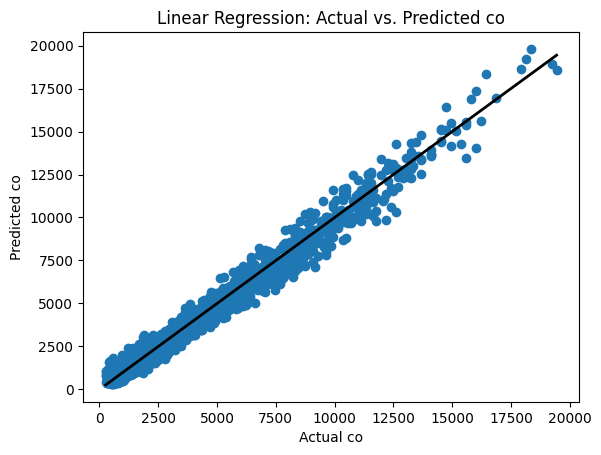

In [ ]:
# Linear Regression
import matplotlib.pyplot as plt
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_lr}")
print(f"R-squared (R2): {r2_lr}")
#bar graph
index = np.arange(len(y_test))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_lr, bar_width, label='Predicted (Linear Regression)', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()
# Plot predicted vs. actual values
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual co")
plt.ylabel("Predicted co")
plt.title("Linear Regression: Actual vs. Predicted co")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()
plt.show()



Bootstrap Results:
Average Mean Squared Error (MSE): 146902.62845766728
Average R-squared (R2): 0.9816153834057445


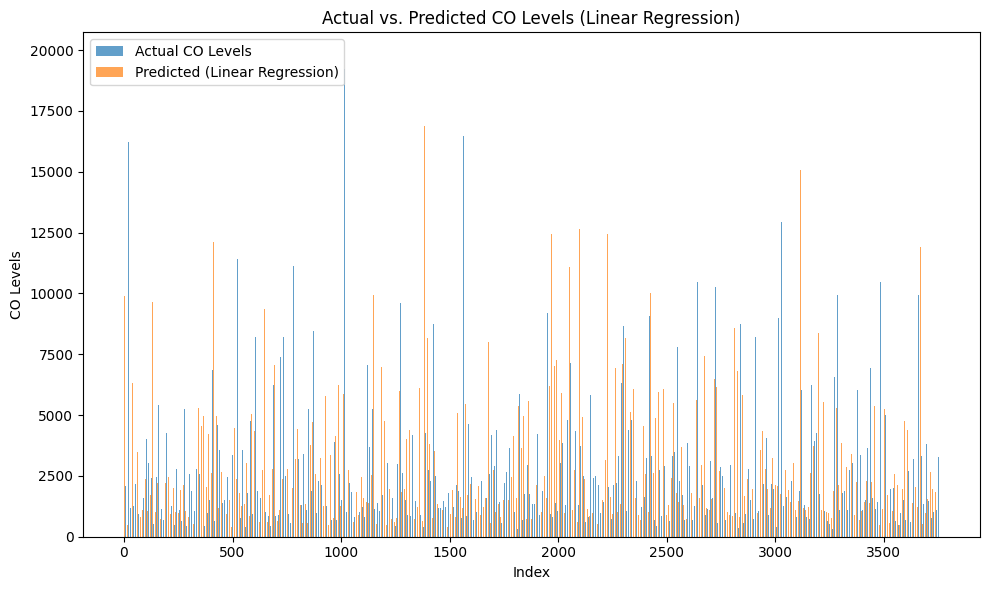

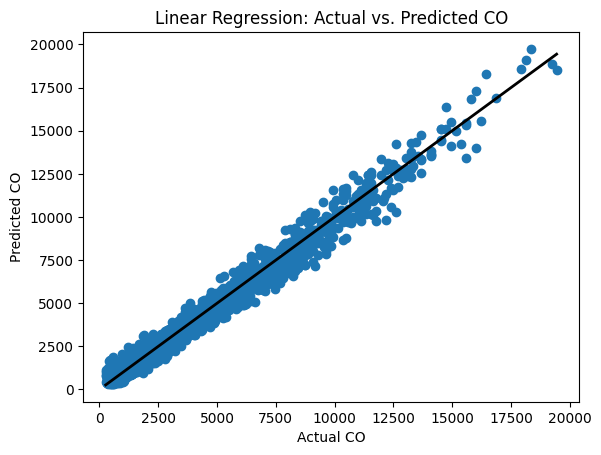

In [ ]:
#bootstrap for linear Regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import resample

n_bootstraps = 100

mse_bootstraps = []
r2_bootstraps = []

for _ in range(n_bootstraps):

    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)


    lr = LinearRegression()
    lr.fit(X_resampled, y_resampled)


    y_pred_lr = lr.predict(X_test)


    mse_bootstrap = mean_squared_error(y_test, y_pred_lr)
    r2_bootstrap = r2_score(y_test, y_pred_lr)

    mse_bootstraps.append(mse_bootstrap)
    r2_bootstraps.append(r2_bootstrap)


print("Bootstrap Results:")
print(f"Average Mean Squared Error (MSE): {np.mean(mse_bootstraps)}")
print(f"Average R-squared (R2): {np.mean(r2_bootstraps)}")

#bar graphs for actual vs. predicted CO levels
index = np.arange(len(y_test))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_lr, bar_width, label='Predicted (Linear Regression)', alpha=0.7)

plt.xlabel('Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (Linear Regression)')
plt.legend()
plt.tight_layout()
plt.show()

#plot for predicted vs. actual CO levels
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual CO")
plt.ylabel("Predicted CO")
plt.title("Linear Regression: Actual vs. Predicted CO")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()


Support Vector Machine (SVM) Regression:
Mean Squared Error (MSE): 4111138.3248043903
R-squared (R2): 0.48549796105753407


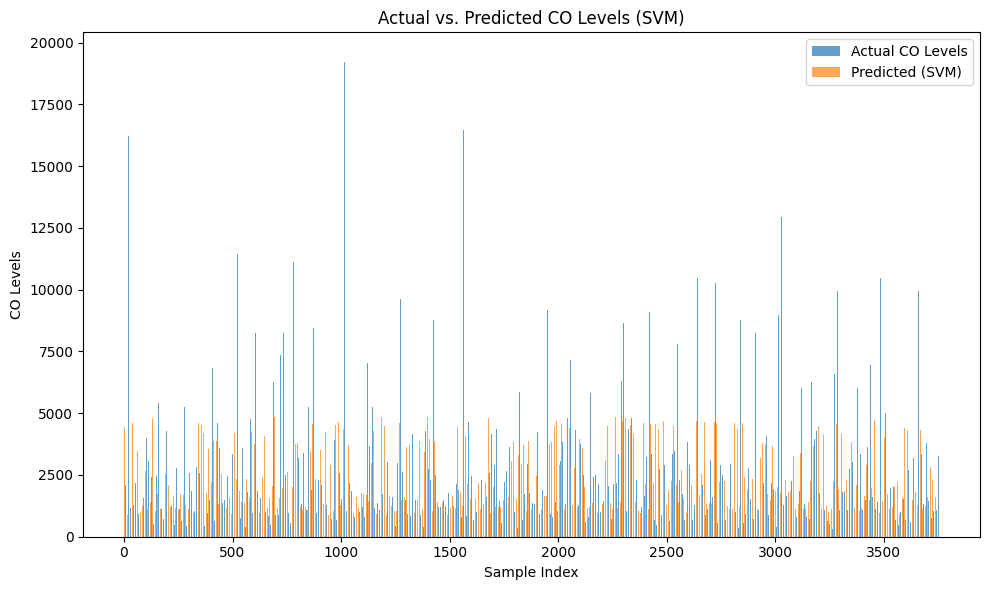

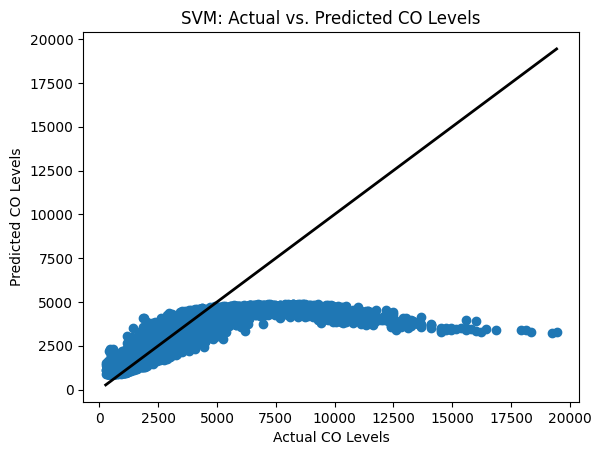

In [ ]:
# Support Vector Machine (SVM) Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Regression:")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R-squared (R2): {r2_svm}")


plt.figure(figsize=(10, 6))
index = np.arange(len(y_test))
bar_width = 0.35
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_svm, bar_width, label='Predicted (SVM)', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (SVM)')
plt.legend()
plt.tight_layout()
plt.show()

plt.scatter(y_test, y_pred_svm)
plt.xlabel("Actual CO Levels")
plt.ylabel("Predicted CO Levels")
plt.title("SVM: Actual vs. Predicted CO Levels")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)

plt.show()


Support Vector Machine (SVM) Regression:
Mean Squared Error (MSE): 4111138.3248043903
R-squared (R2): 0.48549796105753407


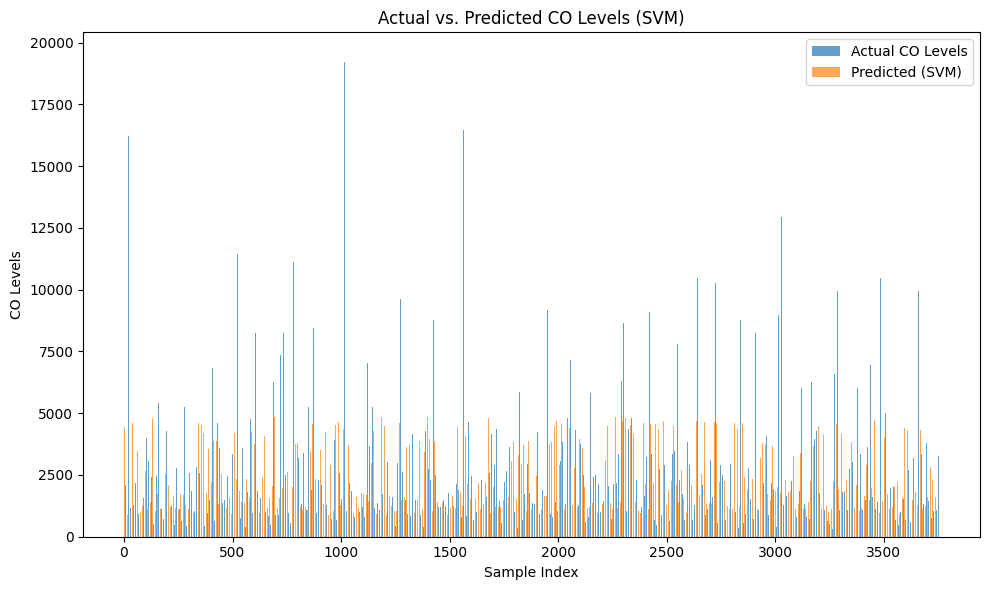

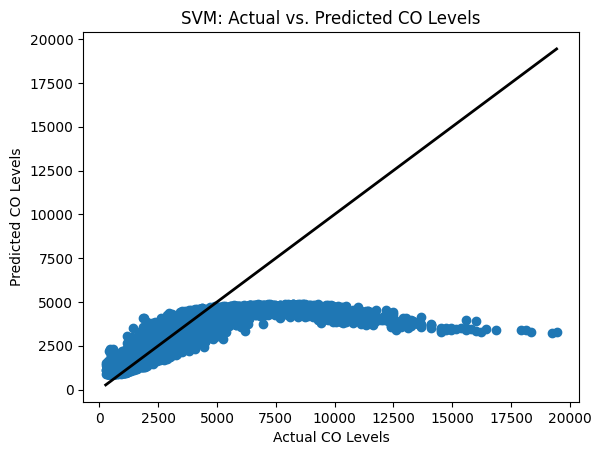

In [ ]:
# Support Vector Machine (SVM) Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

svm = SVR()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Regression:")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R-squared (R2): {r2_svm}")


plt.figure(figsize=(10, 6))
index = np.arange(len(y_test))
bar_width = 0.35
plt.bar(index, y_test, bar_width, label='Actual CO Levels', alpha=0.7)
plt.bar(index + bar_width, y_pred_svm, bar_width, label='Predicted (SVM)', alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('CO Levels')
plt.title('Actual vs. Predicted CO Levels (SVM)')
plt.legend()
plt.tight_layout()
plt.show()

plt.scatter(y_test, y_pred_svm)
plt.xlabel("Actual CO Levels")
plt.ylabel("Predicted CO Levels")
plt.title("SVM: Actual vs. Predicted CO Levels")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()


Mean Squared Error: 273.13664226460054
R-squared (R2) Score: 0.9239044019686794


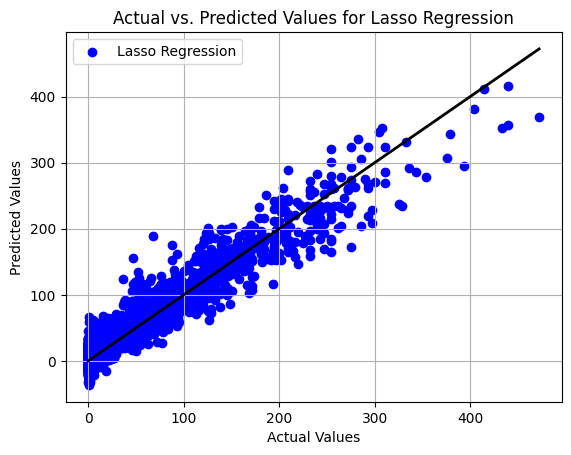

In [ ]:
#Lasso Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
plt.scatter(y_test, y_pred, label='Lasso Regression', color='b')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Lasso Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()


Bootstrap Results for Lasso Regression:
Average Mean Squared Error (MSE): 273.87735132293307
Average R-squared (R2) Score: 0.9236980411585967


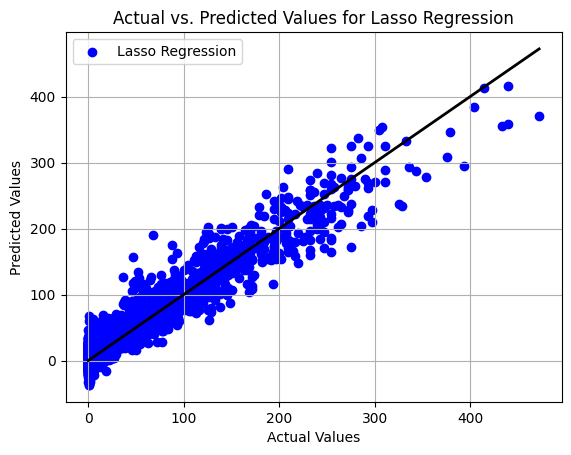

In [ ]:
#bootstraps Lasso Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample

data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_bootstraps = 100
mse_bootstraps = []
r2_bootstraps = []
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
    lasso_model = Lasso(alpha=1.0)
    lasso_model.fit(X_resampled, y_resampled)
    y_pred = lasso_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred)
    r2_bootstrap = r2_score(y_test, y_pred)
    mse_bootstraps.append(mse_bootstrap)
    r2_bootstraps.append(r2_bootstrap)
print("Bootstrap Results for Lasso Regression:")
print(f"Average Mean Squared Error (MSE): {np.mean(mse_bootstraps)}")
print(f"Average R-squared (R2) Score: {np.mean(r2_bootstraps)}")
plt.scatter(y_test, y_pred, label='Lasso Regression', color='b')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Lasso Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error: 273.1727052068934
R-squared (R2) Score: 0.9238943548686719


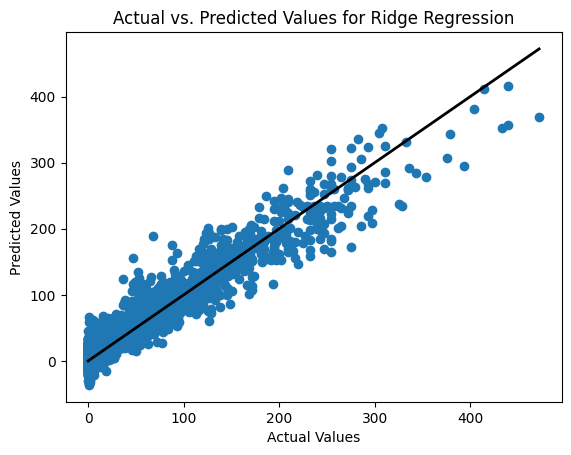

In [ ]:
#Ridge Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()


Bootstrap Results for Ridge Regression:
Average Mean Squared Error (MSE): 273.8407356568214
Average R-squared (R2) Score: 0.9237082422469126


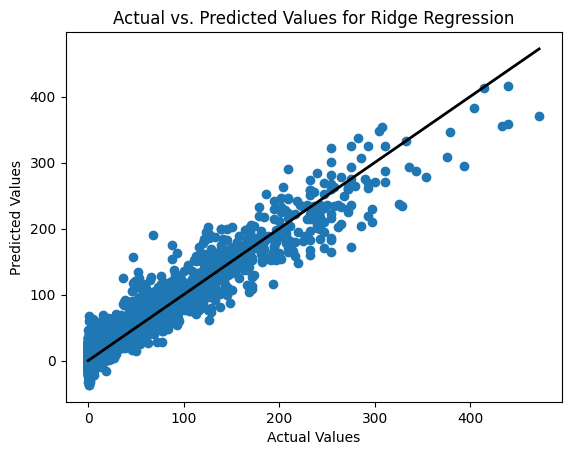

In [ ]:
#Bootstraps Ridge Regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_bootstraps = 100
mse_bootstraps = []
r2_bootstraps = []
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_resampled, y_resampled)
    y_pred = ridge_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred)
    r2_bootstrap = r2_score(y_test, y_pred)
    mse_bootstraps.append(mse_bootstrap)
    r2_bootstraps.append(r2_bootstrap)
print("Bootstrap Results for Ridge Regression:")
print(f"Average Mean Squared Error (MSE): {np.mean(mse_bootstraps)}")
print(f"Average R-squared (R2) Score: {np.mean(r2_bootstraps)}")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Ridge Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.show()


Mean Squared Error: 328.7773023450479
R-squared (R2) Score: 0.9084029691745492


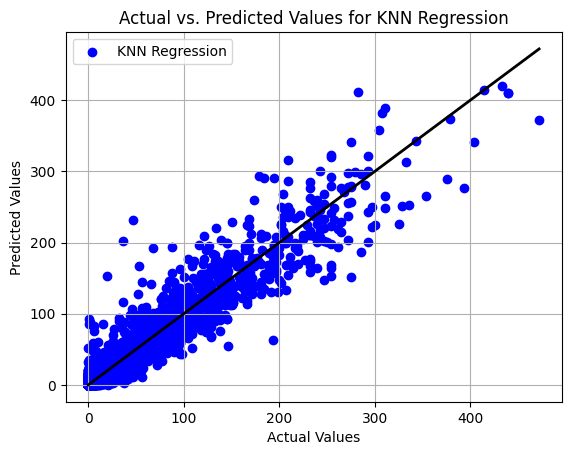

In [ ]:
#KNN

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)
plt.scatter(y_test, y_pred, label='KNN Regression', color='b')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for KNN Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()


Bootstrap Results for KNN Regression:
Average Mean Squared Error (MSE): 382.6920360181043
Average R-squared (R2) Score: 0.8933823777682299


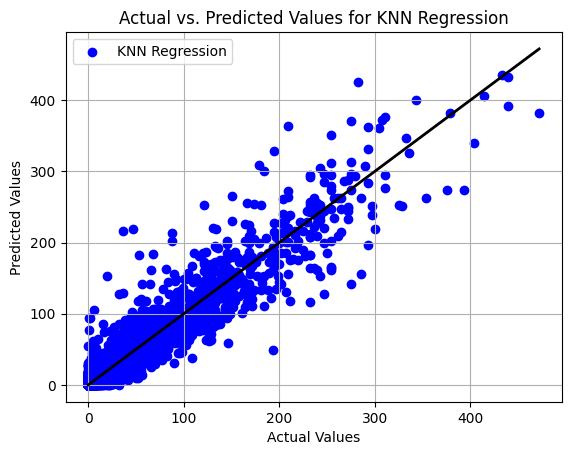

In [ ]:
#Bootstraps KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.utils import resample
data = pd.read_csv("/content/delhi_aqi.csv")
X = data[['co', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']]
y = data['no']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_bootstraps = 100
mse_bootstraps = []
r2_bootstraps = []
for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)
    knn_model = KNeighborsRegressor(n_neighbors=5)
    knn_model.fit(X_resampled, y_resampled)
    y_pred = knn_model.predict(X_test)
    mse_bootstrap = mean_squared_error(y_test, y_pred)
    r2_bootstrap = r2_score(y_test, y_pred)
    mse_bootstraps.append(mse_bootstrap)
    r2_bootstraps.append(r2_bootstrap)
print("Bootstrap Results for KNN Regression:")
print(f"Average Mean Squared Error (MSE): {np.mean(mse_bootstraps)}")
print(f"Average R-squared (R2) Score: {np.mean(r2_bootstraps)}")
plt.scatter(y_test, y_pred, label='KNN Regression', color='b')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for KNN Regression")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='black', linewidth=2)
plt.legend()
plt.grid(True)
plt.show()
